<a href="https://colab.research.google.com/github/Eskdagoat/5105/blob/main/AndrewNicola_801136465_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal number of PCA components: 2

Kernel comparison results:
    kernel  accuracy  precision    recall
0   linear  0.991228   0.986111  1.000000
1     poly  0.885965   0.845238  1.000000
2      rbf  0.956140   0.934211  1.000000
3  sigmoid  0.929825   0.931507  0.957746

Model comparison results:
                 model  accuracy  precision  recall
0                  SVM  0.991228   0.986111     1.0
1  Logistic Regression  0.991228   0.986111     1.0


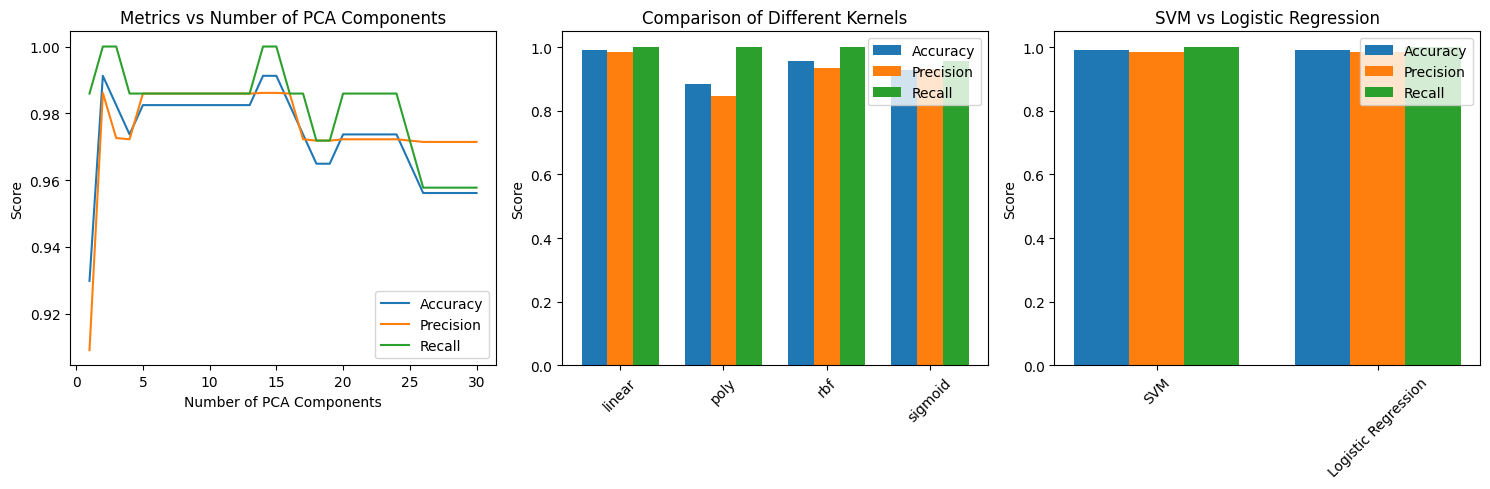

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    """Load and preprocess the cancer dataset"""
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

def evaluate_pca_components(X_train, X_test, y_train, y_test, max_components=30):
    """Evaluate different numbers of PCA components"""
    results = []

    for n_components in range(1, max_components + 1):
        # PCA transformation
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVM
        svm = SVC(kernel='linear', random_state=42)
        svm.fit(X_train_pca, y_train)

        # Predictions
        y_pred = svm.predict(X_test_pca)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results.append({
            'n_components': n_components,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })

    return pd.DataFrame(results)

def compare_kernels(X_train, X_test, y_train, y_test, n_components):
    """Compare different SVM kernels"""
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    results = []

    # PCA transformation
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    for kernel in kernels:
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_pca, y_train)
        y_pred = svm.predict(X_test_pca)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results.append({
            'kernel': kernel,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })

    return pd.DataFrame(results)

def compare_with_logistic_regression(X_train, X_test, y_train, y_test, n_components):
    """Compare SVM with Logistic Regression"""
    # PCA transformation
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_pca, y_train)
    svm_pred = svm.predict(X_test_pca)

    # Logistic Regression
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_pca, y_train)
    lr_pred = lr.predict(X_test_pca)

    results = []
    for model_name, y_pred in [('SVM', svm_pred), ('Logistic Regression', lr_pred)]:
        results.append({
            'model': model_name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred)
        })

    return pd.DataFrame(results)

# Load and preprocess data
X_train, X_test, y_train, y_test = load_and_preprocess_data()

# Evaluate different numbers of PCA components
pca_results = evaluate_pca_components(X_train, X_test, y_train, y_test)

# Find optimal number of components
optimal_components = pca_results.loc[pca_results['accuracy'].idxmax(), 'n_components']
print(f"Optimal number of PCA components: {optimal_components}")

# Compare different kernels
kernel_results = compare_kernels(X_train, X_test, y_train, y_test, optimal_components)
print("\nKernel comparison results:")
print(kernel_results)

# Compare with logistic regression
comparison_results = compare_with_logistic_regression(X_train, X_test, y_train, y_test, optimal_components)
print("\nModel comparison results:")
print(comparison_results)

# Plotting functions
plt.figure(figsize=(15, 5))

# Plot 1: Metrics vs number of components
plt.subplot(131)
plt.plot(pca_results['n_components'], pca_results['accuracy'], label='Accuracy')
plt.plot(pca_results['n_components'], pca_results['precision'], label='Precision')
plt.plot(pca_results['n_components'], pca_results['recall'], label='Recall')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.title('Metrics vs Number of PCA Components')
plt.legend()

# Plot 2: Kernel comparison
plt.subplot(132)
x = range(len(kernel_results))
width = 0.25
plt.bar([i - width for i in x], kernel_results['accuracy'], width, label='Accuracy')
plt.bar(x, kernel_results['precision'], width, label='Precision')
plt.bar([i + width for i in x], kernel_results['recall'], width, label='Recall')
plt.xticks(x, kernel_results['kernel'], rotation=45)
plt.ylabel('Score')
plt.title('Comparison of Different Kernels')
plt.legend()

# Plot 3: SVM vs Logistic Regression
plt.subplot(133)
x = range(len(comparison_results))
width = 0.25
plt.bar([i - width for i in x], comparison_results['accuracy'], width, label='Accuracy')
plt.bar(x, comparison_results['precision'], width, label='Precision')
plt.bar([i + width for i in x], comparison_results['recall'], width, label='Recall')
plt.xticks(x, comparison_results['model'], rotation=45)
plt.ylabel('Score')
plt.title('SVM vs Logistic Regression')
plt.legend()

plt.tight_layout()
plt.show()


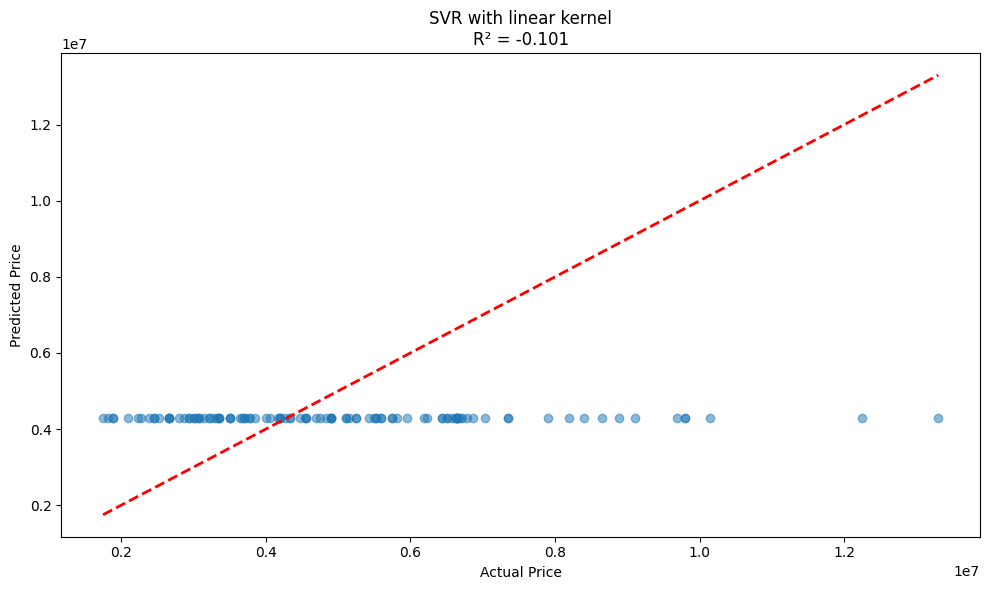

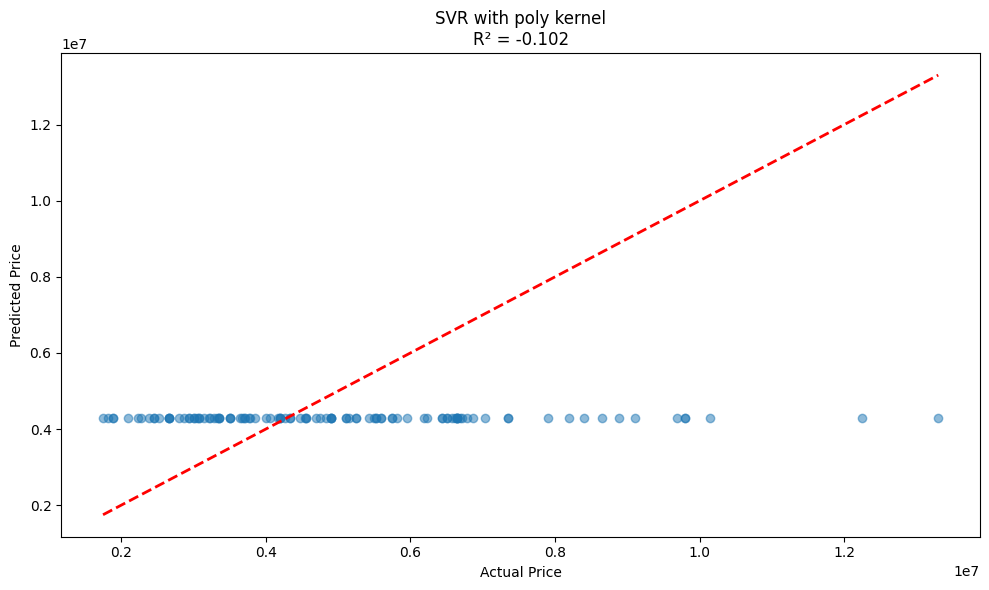

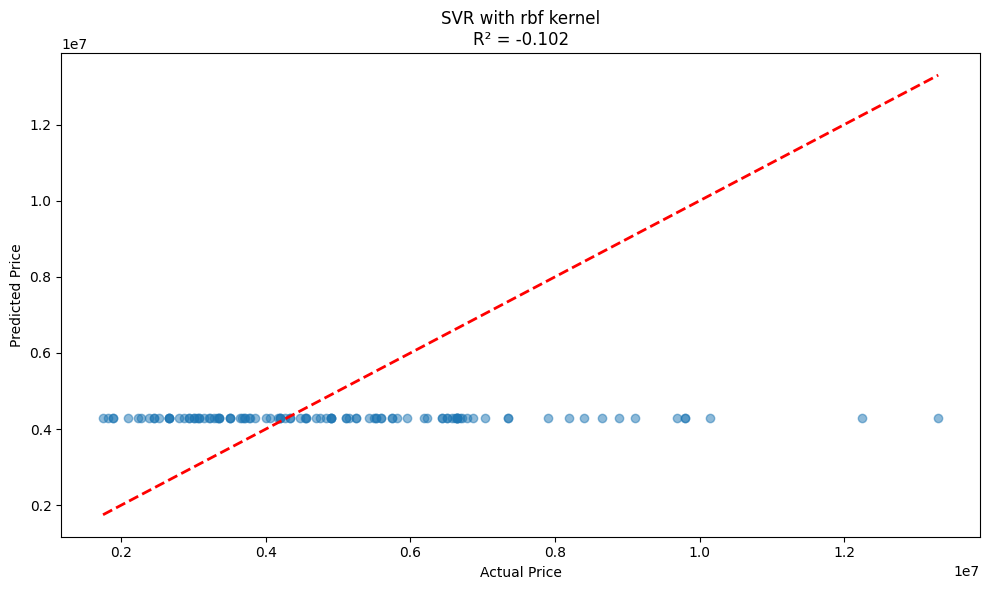

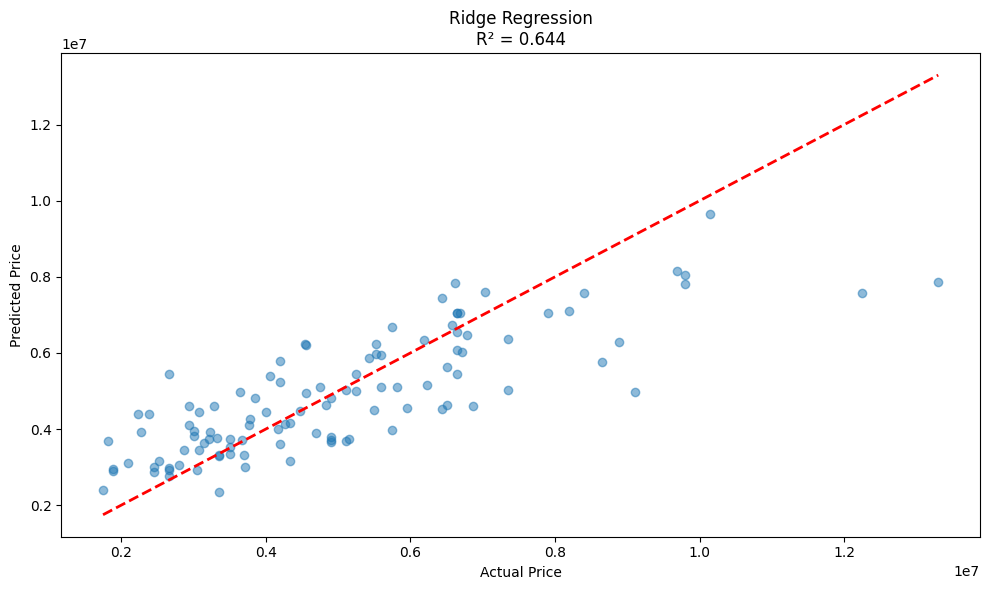

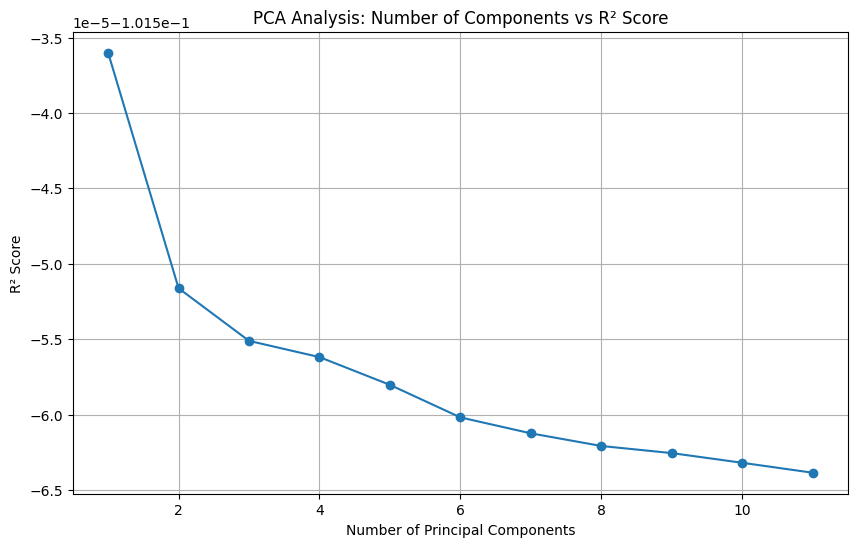


Model Performance Summary:

SVR Results:
linear kernel - R²: -0.101, MSE: 5565648082359.890
poly kernel - R²: -0.102, MSE: 5567864138162.402
rbf kernel - R²: -0.102, MSE: 5567931892136.979

Ridge Regression Results:
R²: 0.644, MSE: 1801382721602.135

Optimal number of PCA components: 1
Best R² score with PCA: -0.102


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Convert categorical variables to numerical
    le = LabelEncoder()
    categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea']

    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Separate features and target
    features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
               'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
               'parking', 'prefarea']
    X = df[features]
    y = df['price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def compare_models(X_train, X_test, y_train, y_test):
    # SVR with different kernels
    kernels = ['linear', 'poly', 'rbf']
    svr_results = {}

    for kernel in kernels:
        svr = SVR(kernel=kernel)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        svr_results[kernel] = {'R2': r2, 'MSE': mse}
        plot_predictions(y_test, y_pred, f'SVR with {kernel} kernel\nR² = {r2:.3f}')

    # Ridge Regression (Linear with regularization)
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    plot_predictions(y_test, y_pred_ridge, f'Ridge Regression\nR² = {r2_ridge:.3f}')

    return svr_results, {'R2': r2_ridge, 'MSE': mse_ridge}

def pca_analysis(X_train, X_test, y_train, y_test):
    max_components = X_train.shape[1]
    r2_scores = []

    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        svr = SVR(kernel='rbf')
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    # Plot PCA results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), r2_scores, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('R² Score')
    plt.title('PCA Analysis: Number of Components vs R² Score')
    plt.grid(True)
    plt.show()

    # Find optimal number of components
    optimal_components = np.argmax(r2_scores) + 1
    return optimal_components, r2_scores

# Main execution
def main():
    # Load your data here
    df = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

    # Prepare the data
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(df)

    # Compare SVR models with different kernels and Ridge regression
    svr_results, ridge_results = compare_models(X_train_scaled, X_test_scaled, y_train, y_test)

    # Perform PCA analysis
    optimal_components, r2_scores = pca_analysis(X_train_scaled, X_test_scaled, y_train, y_test)

    # Print results
    print("\nModel Performance Summary:")
    print("\nSVR Results:")
    for kernel, metrics in svr_results.items():
        print(f"{kernel} kernel - R²: {metrics['R2']:.3f}, MSE: {metrics['MSE']:.3f}")

    print("\nRidge Regression Results:")
    print(f"R²: {ridge_results['R2']:.3f}, MSE: {ridge_results['MSE']:.3f}")

    print(f"\nOptimal number of PCA components: {optimal_components}")
    print(f"Best R² score with PCA: {max(r2_scores):.3f}")

if __name__ == "__main__":
    main()